In [1]:
import pandas as pd
np = pd.np
import matplotlib.pyplot as plt
%pylab inline
from scipy.stats import norm

import StressEQs


Populating the interactive namespace from numpy and matplotlib


## Reading observed cycloid data

In [77]:
obs_lats1 = []
obs_lons1 = []

obsDataFile1 = open('ObsCycloids/DelphiLonLatAT.txt')
for line in obsDataFile1:
    row = line.split()
    obs_lons1.append(float(row[0]))
    obs_lats1.append(float(row[1]))

obs_lats2 = []
obs_lons2 = []

obsDataFile2 = open('ObsCycloids/CiliciaLonLatAT.txt')
for line in obsDataFile2:
    row = line.split()
    obs_lons2.append(float(row[0]))
    obs_lats2.append(float(row[1]))

obs_lats3 = []
obs_lons3 = []

obsDataFile3 = open('ObsCycloids/SidonLonLatAT.txt')
for line in obsDataFile3:
    row = line.split()
    obs_lons3.append(float(row[0]))
    obs_lats3.append(float(row[1]))
    
obs_lats4 = []
obs_lons4 = []

obsDataFile4 = open('ObsCycloids/AlexLonLatCut.txt')
for line in obsDataFile4:
    row = line.split()
    obs_lons4.append(float(row[0]))
    obs_lats4.append(float(row[1]))
    
obs_lats5 = []
obs_lons5 = []

obsDataFile5 = open('ObsCycloids/CarlyLonLatCut.txt')
for line in obsDataFile5:
    row = line.split()
    obs_lons5.append(float(row[0]))
    obs_lats5.append(float(row[1]))
    
obs_lats6 = []
obs_lons6 = []

obsDataFile6 = open('ObsCycloids/DirkLonLat.txt')
for line in obsDataFile6:
    row = line.split()
    obs_lons6.append(float(row[0]))
    obs_lats6.append(float(row[1]))

obs_lats7 = []
obs_lons7 = []

obsDataFile7 = open('ObsCycloids/TyrrelLonLat2.txt')
for line in obsDataFile7:
    row = line.split()
    obs_lons7.append(float(row[0]))
    obs_lats7.append(float(row[1]))

## Picks the next point along a cycloid

In [2]:
def moveCrack(colat, lon, stress, heading, steps, speed):
    distance = speed/1561.5
    new_colat = arccos((cos(colat)*cos(distance))+(sin(colat)*sin(distance)*cos(heading)))
    lon_numer = cos(distance)-cos(new_colat)*cos(colat)
    lon_denom = sin(new_colat)*sin(colat)
    if abs(abs(lon_numer)-abs(lon_denom)) < 1E-12:
        if lon_numer/lon_denom < 0:
            temp_lon = -1
        else:
            temp_lon = 1
    else:
        temp_lon = (lon_numer)/(lon_denom)
    temp_2 = arccos(temp_lon)
    if heading <= math.pi:
        if lon-temp_2 < 0:
            new_lon = lon-temp_2+(2.*math.pi)
        else:
            new_lon = lon-temp_2
    else:
        if lon+temp_2 >= (2*math.pi):
            new_lon = lon+temp_2-(2*math.pi)
        else:
            new_lon = lon+temp_2
    return new_colat, new_lon

In [17]:
def buildCycloids(interior, dirc, ecc, lat_deg, lon_deg, steps, 
                  first_step, oblq_deg, phase_deg, NSR_delta, 
                  speed, threshold):
    
    crackPath = []

    colat = radians(90.-lat_deg)
    lon = radians(lon_deg)
    oblq = radians(oblq_deg)
    phase = radians(phase_deg)

    counter = 0
    counter2 = 0
    round_to = 10
    too_short = 0
    start_stress_too_low = 0
    tot_length = 0.
    first_iter = 1
    first_time_moving = 1
    not_moving = 0
    this_step = first_step

    #StressEQs.getStress(interior, ecc, colat, lon, steps, thisStep, oblq, phase, NSRdelta)
    (stress, mainheading) = StressEQs.getStress(interior, ecc, colat, lon, steps, this_step, oblq, phase, NSR_delta)
    (nextStress, blank) = StressEQs.getStress(interior, ecc, colat, lon, steps, this_step+1, oblq, phase, NSR_delta)

    start_stress = stress

    print(lon_deg, lat_deg, this_step, start_stress, degrees(mainheading))

    if (start_stress >= threshold and nextStress > start_stress):

        while counter <= steps*arcs and not_moving <= steps:

                while counter <= steps*arcs and stress >= threshold and nextStress > stress:
                    this_step += 1
                    if this_step == steps:
                        this_step = 0

        # Forces the crack to begin propagating in the desired direction

                    if first_time_moving == 1:
                        if dirc == 1:
                            oldheading = mainheading
                        elif dirc == 2:
                            oldheading = mainheading-pi
                        (new_colat, new_lon) = moveCrack(colat, lon, stress, oldheading, steps, speed)

                    elif not_moving > 0:
                        if oldheading < math.pi:
                            oldheading = mainheading
                        else:
                            oldheading = mainheading-math.pi
                        (new_colat, new_lon) = moveCrack(colat, lon, stress, oldheading, steps, speed)

        # Stops the crack from switching back on itself (due to symmetry across 180 degrees)

                    else:
                        if abs(oldheading-mainheading) > (math.pi/2.) and abs(oldheading-mainheading) < (3.*math.pi/2.):
                            oldheading = mainheading-math.pi
                        else:
                            oldheading = mainheading   
                        (new_colat, new_lon) = moveCrack(colat, lon, stress, oldheading, steps, speed)

                    lat_deg = 90. - round(degrees(colat), round_to)
                    colat_deg = round(degrees(colat), round_to)
                    lon_deg = round(degrees(lon), round_to)
                    new_lat_deg = 90. - round(degrees(new_colat), round_to)
                    new_colat_deg = round(degrees(new_colat), round_to)
                    new_lon_deg = round(degrees(new_lon), round_to)

                    if first_time_moving == 1:
                            #data = str(lon_deg) + ', ' + str(lat_deg) + '\n'
                            #myfile.write(data)
                        #crackPathOrig.append([this_step, lon_deg, lat_deg])
                        first_time_moving = 0

                    #print(this_step, lon_deg, lat_deg)
                    crackPath.append([this_step, lon_deg, lat_deg])

                    colat = new_colat
                    lon = new_lon

                    (stress, mainheading) = StressEQs.getStress(interior, ecc, colat, lon, steps, this_step, oblq, phase, NSR_delta)
                    (nextStress, blank) = StressEQs.getStress(interior, ecc, colat, lon, steps, this_step+1, oblq, phase, NSR_delta)

                    not_moving = 0
                    counter += 1

                    #print(this_step, stress, nextStress, mainheading, not_moving)

                while counter <= steps*arcs and not_moving <= steps and (stress < start_stress or nextStress < stress):

                    this_step += 1
                    if this_step == steps:
                        this_step = 0

                    (stress, mainheading) = StressEQs.getStress(interior, ecc, colat, lon, steps, this_step, oblq, phase, NSR_delta)
                    (nextStress, blank) = StressEQs.getStress(interior, ecc, colat, lon, steps, this_step+1, oblq, phase, NSR_delta)

                    if abs(oldheading-mainheading) > (pi/2.) and abs(oldheading-mainheading) < (3.*pi/2.):
                        oldheading = mainheading-pi
                    else:
                        oldheading = mainheading

                    not_moving += 1
                    counter += 1

        #print(this_step, stress, nextStress, mainheading, not_moving)
    else:
        start_stress_too_low = 1  
        print("start stress too low or decreasing", stress)

    return(crackPath)




## Setup parameters that create stress / determine propagation

In [69]:
# User inputs

interior = 1
lat_deg = 45.
lon_deg = 45.
steps = 8500.
first_step = 1200.
oblq_deg = 0.
phase_deg = 0.
NSR_delta = 0.0        # <= used to be degrees, now delta, need to fix
dirc = 1
speed = 0.1
threshold = 40. # kPa
arcs = 5.
ecc = 1111

In [80]:
lats = arange(-75,90,15)
lons = arange(0,360,30)

In [81]:
#cycloid = []
out = set()

for each in lons:
    for val in lats:
        oneCycloid = buildCycloids(interior, dirc, ecc, val, each, steps, 
                                   first_step, oblq_deg, phase_deg, NSR_delta, speed, threshold)
        if oneCycloid:
            for cyc in oneCycloid:
                out.add((cyc[1], cyc[2]))
#         plotPath[each, val] = oneCycloid

#display(out)

0 -75 1200.0 37.097295211315874 298.78312747410166
start stress too low or decreasing 37.097295211315874
0 -60 1200.0 42.37609886251466 300.1643749073019
0 -45 1200.0 48.86238376222822 302.5265798628584
0 -30 1200.0 53.58199833932341 305.8961826076388
start stress too low or decreasing 53.58199833932341
0 -15 1200.0 53.26820611025972 310.16853850522693
start stress too low or decreasing 53.26820611025972
0 0 1200.0 45.15648185514167 289.51964277918466
start stress too low or decreasing 45.15648185514167
0 15 1200.0 53.26820611025971 229.8314614947731
start stress too low or decreasing 53.26820611025971
0 30 1200.0 53.5819983393234 234.10381739236115
start stress too low or decreasing 53.5819983393234
0 45 1200.0 48.86238376222822 237.47342013714157
0 60 1200.0 42.37609886251465 239.83562509269808
0 75 1200.0 37.09729521131587 241.21687252589837
start stress too low or decreasing 37.09729521131587
30 -75 1200.0 38.63592468534835 268.2989245223023
start stress too low or decreasing 38.63

In [82]:
plotPath = pd.DataFrame(out, columns=['lon','lat'])

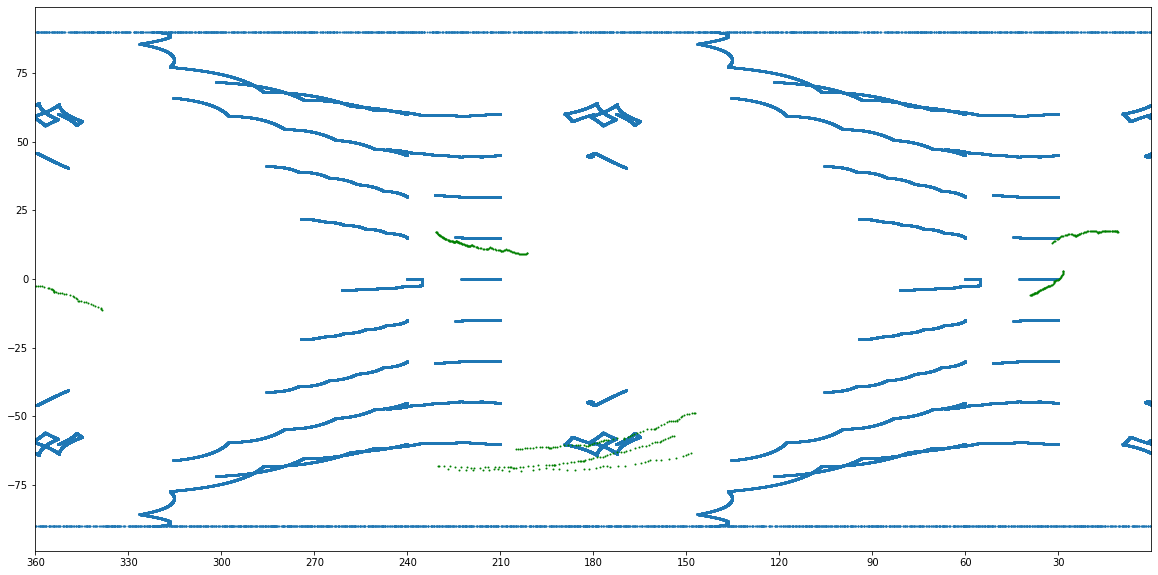

In [83]:
plt.figure(figsize=(20,10))
plt.xlim(360, 0)
plt.xticks(arange(360,0,-30))

plt.scatter(plotPath['lon'], plotPath['lat'], s=1)

plt.scatter(obs_lons1, obs_lats1, s=1, color='green')
plt.scatter(obs_lons2, obs_lats2, s=1, color='green')
plt.scatter(obs_lons3, obs_lats3, s=1, color='green')
plt.scatter(obs_lons4, obs_lats4, s=1, color='green')
plt.scatter(obs_lons5, obs_lats5, s=1, color='green')
plt.scatter(obs_lons6, obs_lats6, s=1, color='green')
plt.scatter(obs_lons7, obs_lats7, s=1, color='green')

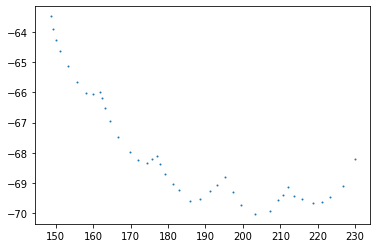

In [66]:
obs_lats = []
obs_lons = []

obsDataFile = open('DelphiLonLatAT.txt')
for line in obsDataFile:
    row = line.split()
    obs_lons.append(float(row[0]))
    obs_lats.append(float(row[1]))

plt.scatter(obs_lons, obs_lats, s=1)